<a href="https://colab.research.google.com/github/Laskiri/Machine-Inteligence/blob/main/Session2_Linear_Regression_Students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 2: Linear Regression


<a name="1"></a>
## 1 - Packages

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](www.numpy.org) is the fundamental package for working with matrices in Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- ``utils.py`` contains helper functions for this assignment. You do not need to modify code in this file.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
%matplotlib inline

In [ ]:
import numpy as np


def load_data():
    data = np.loadtxt("https://drive.google.com/uc?id=1IM7fSyvchd6MPlV_5b8wuakO09aFcw4s", delimiter=',',skiprows=1)

    X = data[:,0]/1000.0
    y = data[:,4]

    return X, y

In [ ]:
import urllib
from urllib.request import urlopen

def feedback(excercise_id, finished=True, understood=True, comment="No comments"):
  base_url = "https://docs.google.com/forms/d/e/"
  base_url += "1FAIpQLSdQwo5EswpUpJnx0cHgPdJzuiUsg7KiJMORmC5VZBSGEhjPrQ"
  base_url += "/formResponse?"
  base_url += "entry.2058183318=" + excercise_id
  base_url += "&entry.217828241=" + ("Yes" if finished else "No")
  base_url += "&entry.676697552=" + ("Yes" if understood else "No")
  base_url += "&entry.379660172=" + comment

  base_url = base_url.replace(" ", "%20")
  urlopen(base_url)
  print("FEEDBACK SUBMITTED. THANKS!!! :D")


## 2 -  Problem Statement

## 2.1 Data Set
We will use the motivating example of housing price prediction. The training data set contains many houses with size and its selling price.

We would like to build a linear regression model using the size we can then predict the price for other houses - say, a house with 1200 sqft


## 3 - Dataset

You will start by loading the dataset for this task.
- The `load_data()` function shown below loads the data into variables `x_train` and `y_train`
  - `x_train` is the size of the house
  - `y_train` is the value of the house
  - Both `X_train` and `y_train` are numpy arrays.

In [ ]:
# load the dataset
x_train, y_train = load_data()

#### View the variables
Before starting on any task, it is useful to get more familiar with your dataset.  
- A good place to start is to just print out each variable and see what it contains.

The code below prints the variable `x_train` and the type of the variable.

In [ ]:
# print x_train
print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train[:5])

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [1.244 1.947 1.725 1.959 1.314]


In [ ]:
# print y_train
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])

Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [300.  509.8 394.  540.  415. ]


#### Check the dimensions of your variables

Another useful way to get familiar with your data is to view its dimensions.

Please print the shape of `x_train` and `y_train` and see how many training examples you have in your dataset.

In [ ]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (99,)
The shape of y_train is:  (99,)
Number of training examples (m): 99


#### Visualize your data



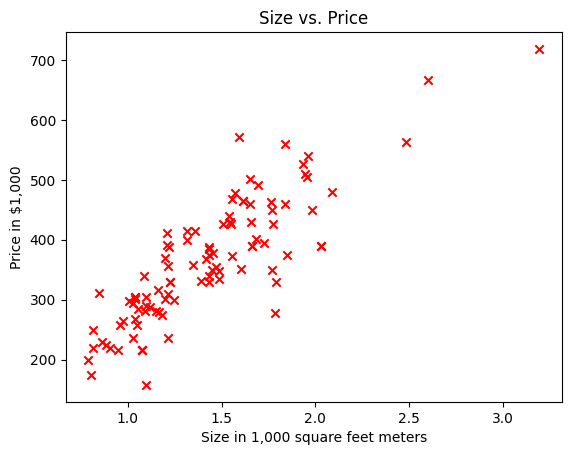

In [ ]:
# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parameters
plt.scatter(x_train, y_train, marker='x', c='r')

# Set the title
plt.title("Size vs. Price")
# Set the y-axis label
plt.ylabel('Price in $1,000')
# Set the x-axis label
plt.xlabel('Size in 1,000 square feet meters')
plt.show()

## 4 Model function

As described in lecture, the model function for linear regression (which is a function that maps from `x` to `y`) is represented as

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

The formula above is how you can represent straight lines - different values of $w$ and $b$ give you different straight lines on the plot. <br/> <br/> <br/>

Now, let's compute the value of $f_{w,b}(x^{(i)})$ for your two data points. You can explicitly write this out for each data point as -

for $x^{(0)}$, `f_wb = w * x[0] + b`

for $x^{(1)}$, `f_wb = w * x[1] + b`



<a name="ex01"></a>
### Exercise 1: Model Predition



Complete the function `compute_model_output` to compute the output of a linear regression model given a vector of $x$ values and a two parameters $w$ and $b$.

> **Note**: The argument description `(ndarray (m,))` describes a Numpy n-dimensional array of shape (m,). `(scalar)` describes an argument without dimensions, just a magnitude.  
> **Note**: `np.zero(n)` will return a one-dimensional numpy array with $n$ entries   


In [ ]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples
      w,b (scalar)    : model parameters
    Returns
      y (ndarray (m,)): target values
    """

    m = x.shape[0]
    f_wb = np.zeros(m)

    return f_wb

Now let's call the `compute_model_output` function and plot the output..



Let's try to get a better intuition for this through the code blocks below. Let's start with $w = 1$ and $b = 4$.

**Note: You can come back to this cell to adjust the model's w and b parameters**

In [ ]:
w = 250
b = 0
print(f"w: {w}")
print(f"b: {b}")

w: 250
b: 0


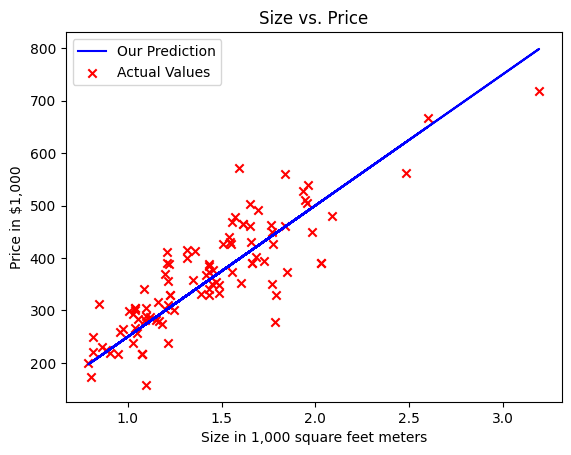

In [ ]:
tmp_f_wb = compute_model_output(x_train, w, b)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Size vs. Price")
# Set the y-axis label
plt.ylabel('Price in $1,000')
# Set the x-axis label
plt.xlabel('Size in 1,000 square feet meters')
plt.legend()
plt.show()

As you can see, setting $w = 1000$ and $b = 10$ does *not* result in a line that fits our data.

Try experimenting with different values of $w$ and $b$. What should the values be for a line that fits our data?



---
SUBMIT FEEDBACK


---



---




In [ ]:
feedback("session2_Exercise1", finished=True, understood=True, comment="No comments")

FEEDBACK SUBMITTED. THANKS!!! :D


<a name="5"></a>
## 5 - Compute Cost

Gradient descent involves repeated steps to adjust the value of your parameter $(w,b)$ to gradually get a smaller and smaller cost $J(w,b)$.
- At each step of gradient descent, it will be helpful for you to monitor your progress by computing the cost $J(w,b)$ as $(w,b)$ gets updated.
- In this section, you will implement a function to calculate $J(w,b)$ so that you can check the progress of your gradient descent implementation.

#### Cost function
As you may recall from the lecture, for one variable, the cost function for linear regression $J(w,b)$ is defined as

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$

- You can think of $f_{w,b}(x^{(i)})$ as the model's prediction of your restaurant's profit, as opposed to $y^{(i)}$, which is the actual profit that is recorded in the data.
- $m$ is the number of training examples in the dataset

#### Model prediction

- For linear regression with one variable, the prediction of the model $f_{w,b}$ for an example $x^{(i)}$ is representented as:

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

This is the equation for a line, with an intercept $b$ and a slope $w$



### Exercise 2: Cost Function

Complete the code of the `compute_cost` methdod below to:

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b
    $$
   
    * The cost for that example  $$cost^{(i)} =  (f_{wb}(x^{(i)}) - y^{(i)})^2$$
    

* Return the total cost over all examples
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} cost^{(i)}$$
  * Here, $m$ is the number of training examples and $\sum$ is the summation operator

If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [ ]:
def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression.

    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities)
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model

    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0]

    cost_sum = 0
    for i in range(m):
        fwb_i = ????
        cost_i = ???   # Hint: use y[i]
        cost_sum = cost_sum + cost_i

    total_cost = ????

    return total_cost

You can check if your implementation was correct by running the following test code:

In [ ]:
# Compute cost with some initial values for paramaters w, b
initial_w = 222
initial_b = 48

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w (zeros): {cost:.3f}')



<class 'numpy.float64'>
Cost at initial w (zeros): 1457.371


**Expected Output**:
<table>
  <tr>
    <td> <b>Cost at w=1000, b=10:<b> 620793.518 </td>
  </tr>
</table>


---
SUBMIT FEEDBACK


---



---




In [ ]:
feedback("session2_Exercise2", finished=True, understood=True, comment="No comments")

FEEDBACK SUBMITTED. THANKS!!! :D


In [ ]:
math.sqrt(2*cost)

53.988343199380935

### Plotting the cost function

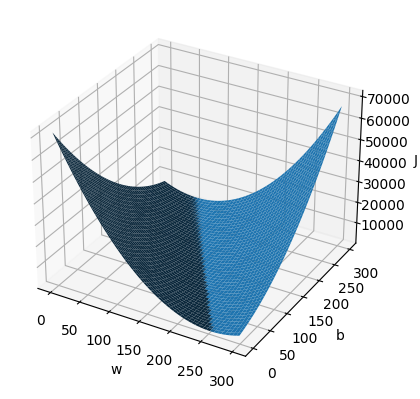

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# Axes3D import has side effects, it enables using projection='3d' in add_subplot
def fun(x, y):
    return x**2 + y

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
w = b = np.arange(0, 300.0, 1)
W, B = np.meshgrid(w, b)
js = np.array(compute_cost(x_train, y_train, np.ravel(W), np.ravel(B)))
J = js.reshape(W.shape)

ax.plot_surface(W, B, J)

ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('J')

plt.show()

**Expected Output**:
<table>
  <tr>
    <td> <b>Gradient at test w=0, b=0 <b></td>
    <td> 1643.6115982424244 1065.2176565656566</td>
  </tr>
</table>

<a name="6"></a>
## 6 - Gradient descent

In this section, you will implement the gradient for parameters $w, b$ for linear regression.

As described in the lecture videos, the gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; &
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where  
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value


You will implement a function called `compute_gradient` which calculates $\frac{\partial J(w)}{\partial w}$, $\frac{\partial J(w)}{\partial b}$

<a name="ex03"></a>
### Exercise 3: Compute Gradient

Please complete the `compute_gradient` function to:

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b
    $$
   
    * The gradient for the parameters $w, b$ from that example
        $$
        \frac{\partial J(w,b)}{\partial b}^{(i)}  =  (f_{w,b}(x^{(i)}) - y^{(i)})
        $$
        $$
        \frac{\partial J(w,b)}{\partial w}^{(i)}  =  (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)}
        $$
    

* Return the total gradient update from all the examples
    $$
    \frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial b}^{(i)}
    $$
    
    $$
    \frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial w}^{(i)}
    $$
  * Here, $m$ is the number of training examples and $\sum$ is the summation operator

If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [ ]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      x (ndarray (m,)): Data, m examples
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b
     """

    # Number of training examples
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
      f_wb_i = x[i]*w + b
      dj_dw += ??? # Fix this.
      dj_db += ??? # Fix this.


    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

Run the cells below to check your implementation of the `compute_gradient` function with two different initializations of the parameters $w$,$b$.

In [ ]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): -551.7836239797983 -363.1560808080808


Now let's run the gradient descent algorithm implemented above on our dataset.

**Expected Output**:
<table>
  <tr>
    <td> <b>Gradient at  w=0, b=0 <b></td>
    <td> -551.7836239797981 -363.1560808080808</td>
  </tr>
</table>

In [ ]:
# Compute and display cost and gradient with non-zero w
test_w = 1000
test_b = 10
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: 1643.6115982424237 1065.2176565656566


**Expected Output**:
<table>
  <tr>
    <td> <b>Gradient at test w=0, b=0 <b></td>
    <td> 1643.6115982424244 1065.2176565656566</td>
  </tr>
</table>


---
SUBMIT FEEDBACK


---



---




In [ ]:
feedback("session2_Exercise3", finished=True, understood=True, comment="No comments")

FEEDBACK SUBMITTED. THANKS!!! :D


<a name="ex04"></a>
### Exercise 4:  Updating Equation Gradient Descent


You will now find the optimal parameters of a linear regression model by using batch gradient descent. Recall batch refers to running all the examples in one iteration.

- **TASK**: Implement the updating equation of gradient descent

$$\begin{align*}&
\phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; &
\newline & \end{align*}$$



- A good way to verify that gradient descent is working correctly is to look
at the value of $J(w,b)$ and check that it is decreasing with each step.

- Assuming you have implemented the gradient and computed the cost correctly and you have an appropriate value for the learning rate alpha, $J(w,b)$ should never increase and should converge to a steady value by the end of the algorithm.

In [ ]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """

    # number of training examples
    m = len(x)

    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = [w_in]
    b_history = [b_in]
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )

        # Update Parameters using w, b, alpha and gradient
        w = ??? # Fix this
        b = ??? # Fix this

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            b_history.append(b)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w, b, J_history, w_history, b_history #return w and J,w history for graphing

Now let's run the gradient descent algorithm above to learn the parameters for our dataset.

Iteration    0: Cost 67073.97   
Iteration  500: Cost  1540.03   
Iteration 1000: Cost  1504.39   
Iteration 1500: Cost  1483.65   
Iteration 2000: Cost  1471.59   
Iteration 2500: Cost  1464.58   
Iteration 3000: Cost  1460.50   
Iteration 3500: Cost  1458.13   
Iteration 4000: Cost  1456.75   
Iteration 4500: Cost  1455.95   
w,b found by gradient descent: 213.85161522679817 60.05528648473229


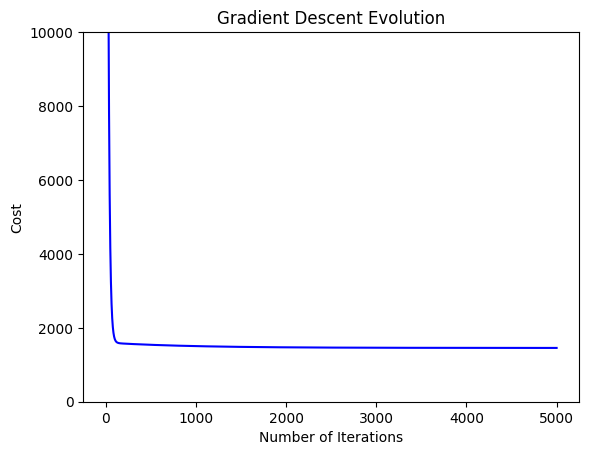

In [ ]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 5000
alpha = 0.01

w_optimal,b_optimal,J_history, w_history, b_history = gradient_descent(x_train ,y_train, initial_w, initial_b,
                     compute_cost, compute_gradient, alpha, iterations)


print("w,b found by gradient descent:", w_optimal, b_optimal)

# Set the title
plt.title("Gradient Descent Evolution")
# Set the y-axis label
plt.ylabel('Cost')
plt.ylim(0,10000)
# Set the x-axis label
plt.xlabel('Number of Iterations')

#plt.ylim(4,10)

# Plot the linear fit
plt.plot(np.arange(0,iterations,1), J_history, c = "b")




**Expected Output**:
<table>
  <tr>
    <td> <b> w, b found by gradient descent<b></td>
    <td> 216.3873236706632 56.2526725869892</td>
  </tr>
</table>


---
SUBMIT FEEDBACK


---



---




In [ ]:
feedback("session2_Exercise4", finished=True, understood=True, comment="No comments")

### Inspecting behaviour of Gradient Descent

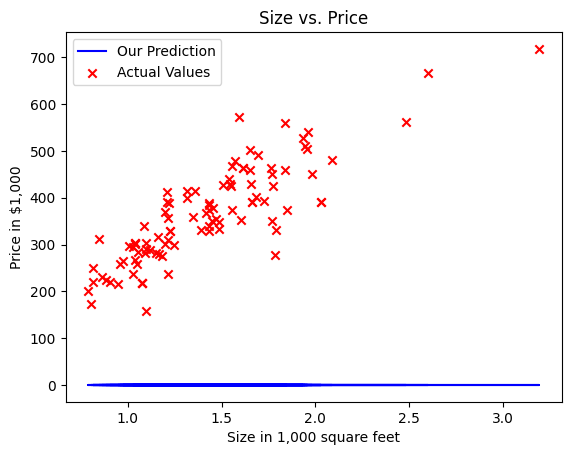

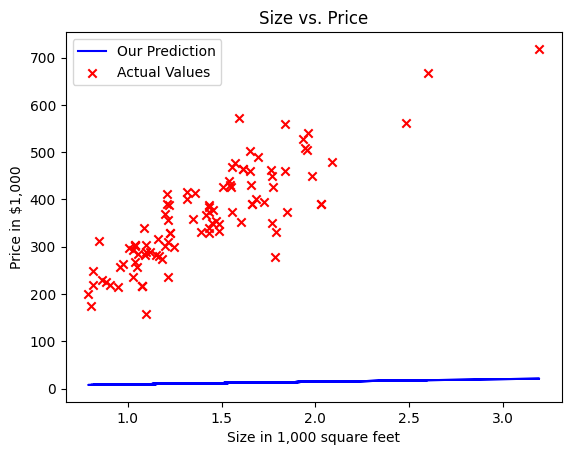

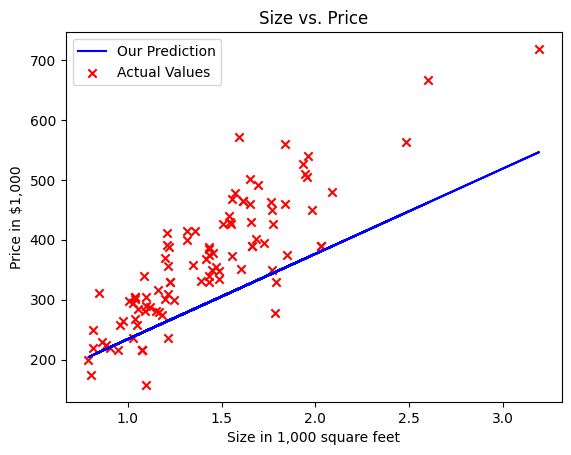

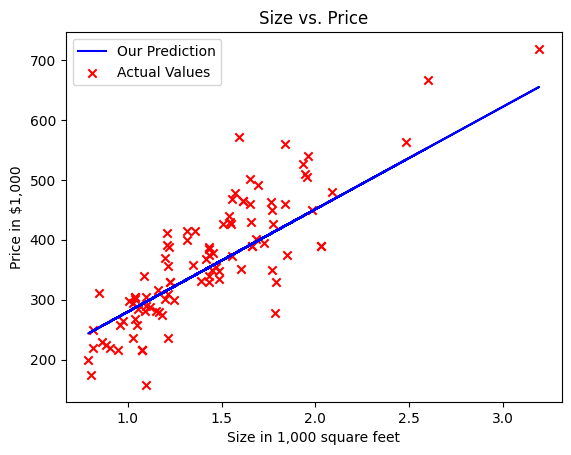

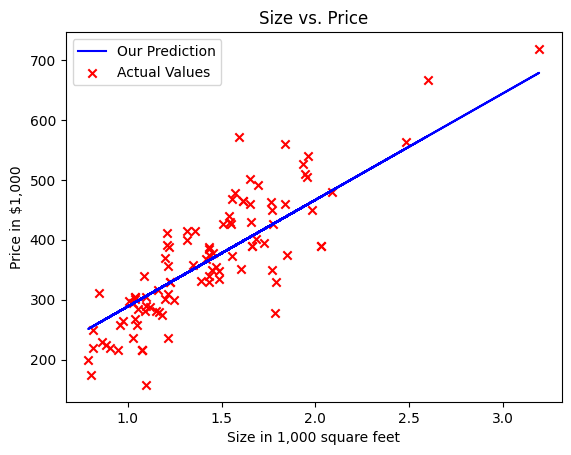

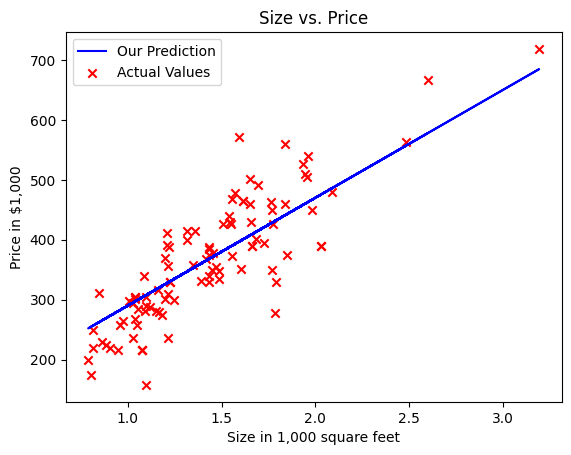

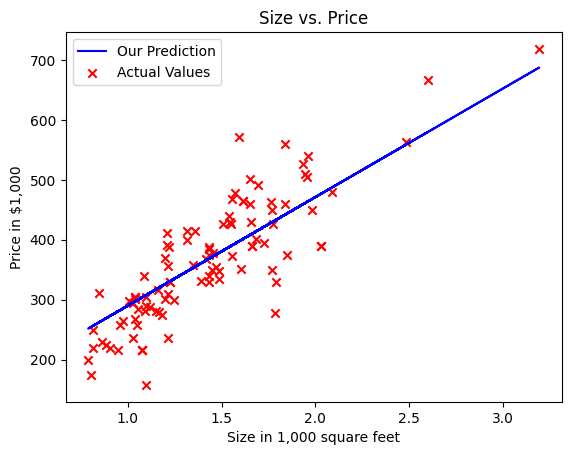

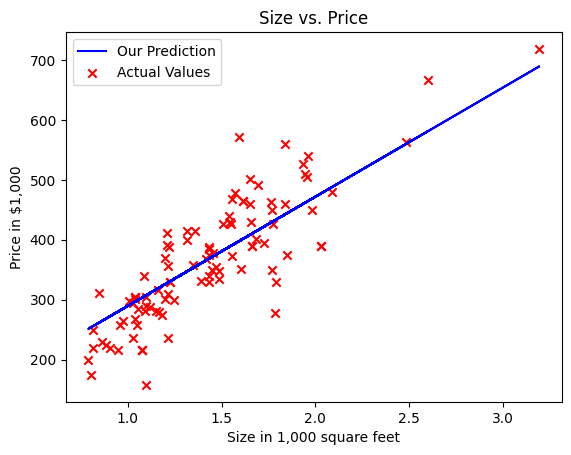

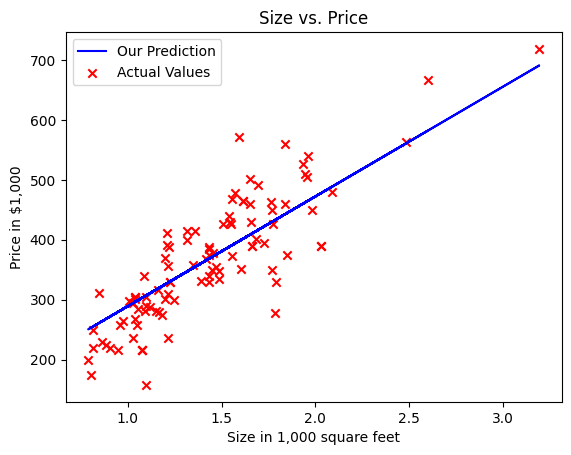

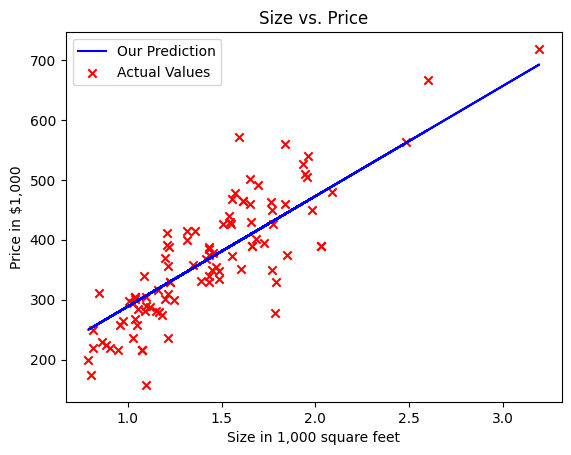

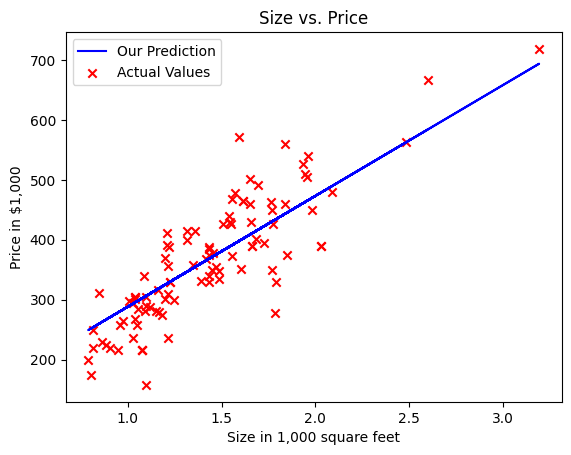

In [ ]:
for (w_t, b_t) in zip(w_history, b_history):
  tmp_f_wb = compute_model_output(x_train, w_t, b_t)

  # Plot our model prediction
  plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

  # Plot the data points
  plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

  # Set the title
  plt.title("Size vs. Price")
  # Set the y-axis label
  plt.ylabel('Price in $1,000')
  # Set the x-axis label
  plt.xlabel('Size in 1,000 square feet')
  plt.legend()
  plt.show(block=False)
  plt.pause(1)


### Making Predictions

We will now use the final parameters from gradient descent to plot the linear fit.

Recall that we can get the prediction for a single example $f(x^{(i)})= wx^{(i)}+b$.

To calculate the predictions on the entire dataset, we can loop through all the training examples and calculate the prediction for each example. This is shown in the code block below.

In [ ]:
predicted = compute_model_output(x_train, w_optimal, b_optimal)

We will now plot the predicted values to see the linear fit.

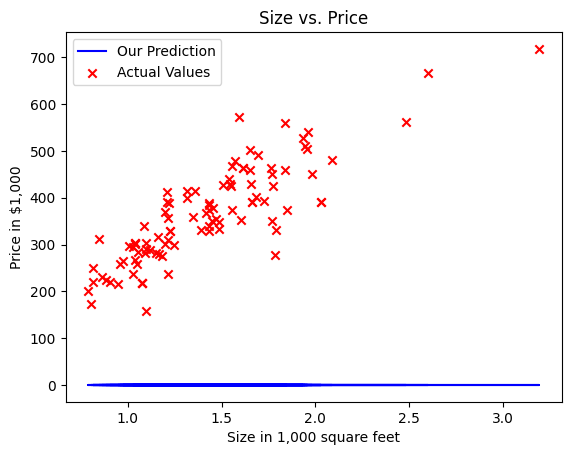

In [ ]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b",label='Our Prediction')

# Create a scatter plot of the data.
plt.scatter(x_train, y_train, marker='x', c='r', label='Actual Values')

# Set the title
plt.title("Size vs. Price")
# Set the y-axis label
plt.ylabel('Price in $1,000')
# Set the x-axis label
plt.xlabel('Size in 1,000 square feet')
plt.legend()
plt.show()



Your final values of $w,b$ can also be used to make predictions on profits. Let's predict what the profit would be in areas of 35,000 and 70,000 people.

- The model takes in population of a city in 10,000s as input.

- Therefore, 35,000 people can be translated into an input to the model as `np.array([3.5])`

- Similarly, 70,000 people can be translated into an input to the model as `np.array([7.])`


In [ ]:
predict1 = 3.5 * w_optimal + b_optimal
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w_optimal + b_optimal
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $0.00
For population = 70,000, we predict a profit of $0.00


**Expected Output**:
<table>
  <tr>
    <td> <b> For area = 1,000, we predict a selling price of<b></td>
    <td> $288102.99 </td>
  </tr>
  
  <tr>
    <td> <b> For area = 2,000, we predict a selling price of<b></td>
    <td> $473541.07 </td>
  </tr>
</table>